In [1]:
import numpy as np
import pprint
import pandas as pd

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cards import get_deck, cards_to_value_sum, sort_cards, cards_to_values

from itertools import combinations # permutations
from scipy.special import comb

In [3]:
play_jokers = False

deck = get_deck(play_jokers=play_jokers)

len(deck)

52

# Number of Card Combinations

In [4]:
from stats import calculate_number_card_combinations

In [5]:
n_j = 5
cards_unknown = deck[:-1]
N = len(cards_unknown)

combinations_ = calculate_number_card_combinations(N, n_j)
print(f'n_j={n_j}, N={N} yields {combinations_/1.e6:0.1f} million combinations')

n_j=5, N=51 yields 2.3 million combinations


# Two-Player Stats

In [6]:
from stats import calculate_p_hj_gt_hi_accurate, calculate_p_hj_gt_hi_n_j_prior

In [7]:
def situation_setup(example):
    h_i = cards_to_value_sum(example['cards_i'])
    cards_unknown = list(set(example['deck_explore']) - set(example['cards_i']))
    
    if 'pile_top' in example.keys():
        cards_unknown = list(set(cards_unknown) - set(example['pile_top']))
        
    cards_unknown = sort_cards(cards_unknown)
    
    if 'N' in example.keys():
        cards_unknown = cards_unknown[:example['N']]
        
    return h_i, cards_unknown

In [8]:
play_jokers = False

# ======
deck = get_deck(play_jokers=play_jokers)

examples = {}

examples[1] = {'n_j': 2, 'cards_i': ['As', 'Ah', '3c'], 'deck_explore':deck[5:], 'N':5}
examples[2] = {'n_j': 3, 'cards_i': ['7h'], 'deck_explore':deck[6:], 'N':20}
examples[3] = {'n_j': 3, 'cards_i': ['3h', '2h', 'As', 'Ah'], 'deck_explore':deck[3:], 'N':40}
examples[4] = {'n_j': 3, 'cards_i': ['3h', '2h', 'As', 'Ah'], 'deck_explore':deck[3:], 'N':None}
examples[5] = {'n_j': 3, 'cards_i': ['3h', '2h', 'As', 'Ah'], 'deck_explore':deck[3:-1], 'N':None}
examples[6] = {'n_j': 3, 'cards_i': ['3h', '2h', 'As', 'Ah'], 'deck_explore':deck[3:-2], 'N':None, 'pile_top': ['2s', '3s', '4s']}
examples[7] = {'n_j': 1, 'cards_i': ['As', 'Ah', '3c'], 'deck_explore':deck[5:], 'pile_top':['3s', '4s','5s','6s']}

In [10]:
# Testing
verbose = 0

for idx in examples.keys():
    h_i, cards_unknown = situation_setup(examples[idx])
    p_accurate = calculate_p_hj_gt_hi_accurate(cards_unknown, examples[idx]['n_j'], h_i, verbose=verbose)
    p_priored = calculate_p_hj_gt_hi_n_j_prior(examples[idx]['n_j'], cards_unknown, h_i=h_i, play_jokers=play_jokers, verbose=verbose)

    #print('-' * 20)
    print(p_accurate, p_priored)
    #print((p_priored - p_accurate) *100./p_accurate)
    assert np.allclose(p_priored, p_accurate, rtol=1e-5, atol=0)
   

0.1 0.10000000000000009
0.9964912280701754 0.9964912280701755
0.9989878542510121 0.9989878542510121
0.9993412384716732 0.9993412384716733
0.9992952783650458 0.9992952783650458
0.999812382739212 0.999812382739212
0.7380952380952381 0.7380952380952381


# Visualise

In [11]:
from visualise import visualise_cards, add_stats

n_j=1, h_i=5, n_jokers=0 yields
t_nj=6
N: 42
['2c', '2s', '2h', '3d', '3h', '4d', '4h', '4c', '5d', '5c', '5h', '6h', '6d', '6c', '7h', '7c', '7s', '7d', '8d', '8s', '8h', '8c', '9d', '9c', '9h', '9s', '10s', '10c', '10d', '10h', 'Jd', 'Js', 'Jc', 'Jh', 'Qd', 'Qh', 'Qs', 'Qc', 'Kh', 'Ks', 'Kd', 'Kc']
n: 11
['2c', '2s', '2h', '3d', '3h', '4d', '4h', '4c', '5d', '5c', '5h']
total: 11
successes: 0
P(h_j>h_i|U)=0.000
N=42, K=11, n_j=1, yields:
p(U)=0.262
P(h_j>h_i=5|n_j, cards)=0.738


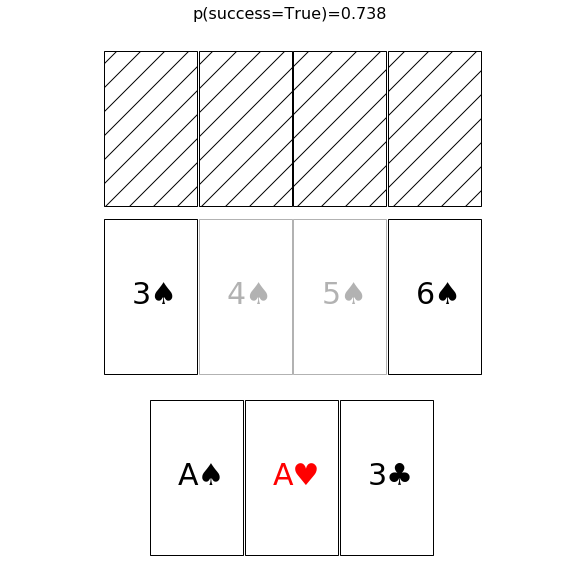

In [12]:
idx = 7
verbose = 1

#cards_hand = ['As', '7d', 'Kc', 'Wa', 'Wb']
#cards_pile = ['2s', '3s', '4s']

cards_hand = examples[idx]['cards_i']
n_j = examples[idx]['n_j']

cards_pile = examples[idx]['pile_top']
h_i, cards_unknown = situation_setup(examples[idx])

ax = visualise_cards(cards_hand, ax=None, cards_type='hand', show_spines=False)
visualise_cards(cards_pile, ax=ax, cards_type='pile', show_spines=False)
visualise_cards(4, ax=ax, cards_type='opponent', show_spines=False)
add_stats(n_j, cards_unknown, ax, h_i=h_i, play_jokers=play_jokers, verbose=verbose)

# One Game

In [19]:
import game
from cards import get_deck

from visualise import plot_game_turns_per_round
from summarise_game import game_output_to_yaniv_probabilities
from summarise_game import round_output_to_turns_df

In [26]:
players = ['Albert','Roland'] #, 'Amos','Claude']
#players = {'Eyal': 'human','Roland':'bot', 'Amos':'bot','Claude':'bot'}
end_game_score = 200

do_stats = False
play_jokers = True
seed = 1

verbose = 0
game_ = game.Game(players, seed=seed, verbose=verbose, end_game_score=end_game_score, 
                  do_stats=do_stats, play_jokers=play_jokers)
game_output = game_.play()

Albert is the winner with 193 points


In [27]:
players = ['Albert','Roland'] #, 'Amos','Claude']
#players = {'Eyal': 'human','Roland':'bot', 'Amos':'bot','Claude':'bot'}
end_game_score = 200

do_stats = False
play_jokers = True
seed = 1

verbose = 0
game_ = game.Game(players, seed=seed, verbose=verbose, end_game_score=end_game_score, 
                  do_stats=do_stats, play_jokers=play_jokers)
game_output = game_.play()

Albert is the winner with 193 points


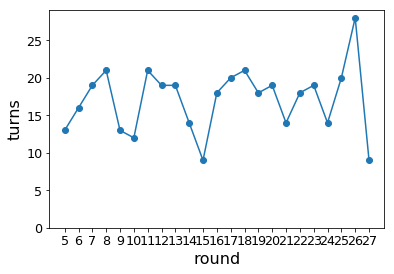

In [28]:
plot_game_turns_per_round(game_output, plot_type='series')

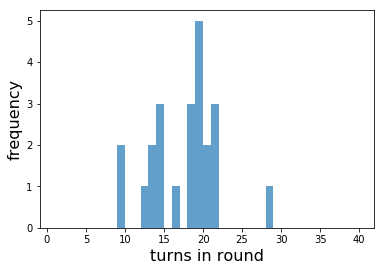

In [29]:
plot_game_turns_per_round(game_output,plot_type='histogram')

In [31]:
round_ = 1
round_output_to_turns_df(game_output[round_])

,Albert_cards,Albert_ncards,Roland_cards,Roland_ncards,name,pile_top_accessible,pull_source,pulls,throws,yaniv_call
1,"[3c, 2s, 10h, 3s, Qs]",5,"[8s, Kh, 8h, 6s, 2d]",5,Albert,[Ks],deck,5d,[10h],NaN
2,"[3c, 2s, 3s, Qs, 5d]",5,"[8s, Kh, 8h, 6s, 2d]",5,Roland,[10h],deck,9h,"[8s, 8h]",NaN
3,"[3c, 2s, 3s, Qs, 5d]",5,"[Kh, 6s, 2d, 9h]",4,Albert,"[8s, 8h]",deck,8d,[Qs],NaN
4,"[3c, 2s, 3s, 5d, 8d]",5,"[Kh, 6s, 2d, 9h]",4,Roland,[Qs],deck,Kc,[Kh],NaN
5,"[3c, 2s, 3s, 5d, 8d]",5,"[6s, 2d, 9h, Kc]",4,Albert,[Kh],deck,Ac,[8d],NaN
6,"[3c, 2s, 3s, 5d, Ac]",5,"[6s, 2d, 9h, Kc]",4,Roland,[8d],deck,7h,[Kc],NaN
7,"[3c, 2s, 3s, 5d, Ac]",5,"[6s, 2d, 9h, 7h]",4,Albert,[Kc],deck,4c,"[3c, 3s]",NaN
8,"[2s, 5d, Ac, 4c]",4,"[6s, 2d, 9h, 7h]",4,Roland,"[3c, 3s]",pile,3c,[9h],NaN
9,"[2s, 5d, Ac, 4c]",4,"[6s, 2d, 7h, 3c]",4,Albert,[9h],deck,4h,[5d],NaN
10,"[2s, Ac, 4c, 4h]",4,"[6s, 2d, 7h, 3c]",4,Roland,[5d],deck,6h,[7h],NaN


In [32]:
pd.DataFrame(game_output[round_]['end'])

,Albert,Roland
gained_points,0,7
points_conclusion,0,7


In [33]:
game_output_to_yaniv_probabilities(game_output, pov_name='Albert')

round,1,6,7,8,9,12,13,14,15,16,18,19,22,23
turn,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970638
12,NaN,0.825036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.865546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,0.990987,NaN,NaN,0.993199,NaN,1.0,NaN,NaN,NaN
19,NaN,NaN,NaN,0.997555,0.996898,NaN,NaN,NaN,NaN,0.65977,NaN,0.928818,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,0.981348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,0.9944,NaN,NaN,NaN,NaN,0.993944,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.908271,NaN


In [34]:
game_output_to_yaniv_probabilities(game_output, pov_name='Roland')

round,2,3,4,5,10,11,17,20,21
turn,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,0.991684,NaN,NaN,NaN
13,NaN,NaN,NaN,0.999961,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,0.999351,NaN,0.998338,0.982119,NaN
16,0.977941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,0.999901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990358
21,NaN,NaN,0.912137,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
len(game_output[1]['start']['deck_ordered'])

52

# Multiple Games

In [35]:
import os
from glob import glob
import json

from summarise_game import game_output_keys_to_int

In [36]:
GAMES_DATA_PATH = f'{os.pardir}/data/games/test_2players_conditioned/'
GAMES_DATA_PATH

'../data/games/test_2players_conditioned/'

In [37]:
n_games = 4
do_stats = False
play_jokers = False
# ===========
# Defining index of first game
game_files = glob(f'{GAMES_DATA_PATH}*.json')

if game_files:
    idx_last = np.max(list(map(lambda x: int(x.split('/')[-1].split('.json')[0]), game_files)))
else:
    idx_last = -1
# ----------

verbose = 0

for idx in range(idx_last + 1, idx_last + 1 + n_games):
    game_ = game.Game(players, seed=idx, verbose=verbose, end_game_score=end_game_score, 
                      do_stats=do_stats, play_jokers=play_jokers)
    
    game_output = game_.play()
    
    game_path = f'{GAMES_DATA_PATH}{idx:003.0f}.json'
    print(game_path)
    with open(game_path, 'w') as fp:
        json.dump(game_output, fp)

Roland is the winner with 114 points
../data/games/test_2players_conditioned/004.json
Roland is the winner with 114 points
../data/games/test_2players_conditioned/005.json
Roland is the winner with 141 points
../data/games/test_2players_conditioned/006.json
Roland is the winner with 133 points
../data/games/test_2players_conditioned/007.json


In [38]:
game_files = glob(f'{GAMES_DATA_PATH}*.json')

l_game_outputs = []

for game_file in game_files:
    with open(game_file) as fp:
        game_output = json.load(fp)
        
    game_output = game_output_keys_to_int(game_output)
    
    l_game_outputs.append(game_output)
    
print(len(l_game_outputs))

8


In [39]:
game_id = 0
round_ = 3
round_output_to_turns_df(l_game_outputs[game_id][round_]).head(5)

,Albert_cards,Albert_ncards,Roland_cards,Roland_ncards,name,pile_top_accessible,pull_source,pulls,throws,yaniv_call
1,"[10c, 5s, 8c, Ac, 3h]",5,"[10s, 10d, Jh, Kc, 2h]",5,Roland,[8h],deck,Qs,"[10s, 10d]",NaN
2,"[10c, 5s, 8c, Ac, 3h]",5,"[Jh, Kc, 2h, Qs]",4,Albert,"[10s, 10d]",deck,3d,[10c],NaN
3,"[5s, 8c, Ac, 3h, 3d]",5,"[Jh, Kc, 2h, Qs]",4,Roland,[10c],deck,6h,[Jh],NaN
4,"[5s, 8c, Ac, 3h, 3d]",5,"[Kc, 2h, Qs, 6h]",4,Albert,[Jh],deck,6c,[8c],NaN
5,"[5s, Ac, 3h, 3d, 6c]",5,"[Kc, 2h, Qs, 6h]",4,Roland,[8c],deck,Qd,[Kc],NaN
